# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [14]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        self.Q = {}
        for a in self.actions:
            #self.Q[('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0',a)] = 0
            self.Q[((3,11),a)] = 0
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        print(self.Q)
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
        
        ## TODO 2
        ## Implement epsilon greedy policy here 
        
        state_set = set([k[0] for k in agent.Q.keys()])
        if stateStr not in state_set:
            for a in self.actions:
                self.Q[(stateStr,a)] = 0
        
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice != 1:    
            action_dict = {}
            for key,value in self.Q.items():
                if key[0]==stateStr:
                    action_dict[key[1]] = value
            highest=max(action_dict.values())  
            actions = [a for a,v in action_dict.items() if v == highest]
            # If multiple max chose random
            action = np.random.choice(actions)
            #actions = np.nonzero(self.Q[s,:] == self.Q[s,:][np.argmax(self.Q[s,:])])
            #action = np.random.choice(actions[0])

        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here

        td_target = reward + self.gamma*self.Q[(state2Str, action2)]
        self.Q[(state1Str, action1)] += self.alpha*(td_target - self.Q[(state1Str, action1)])
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

{('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 0): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 1): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 2): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 3): 0}


<IPython.core.display.Javascript object>


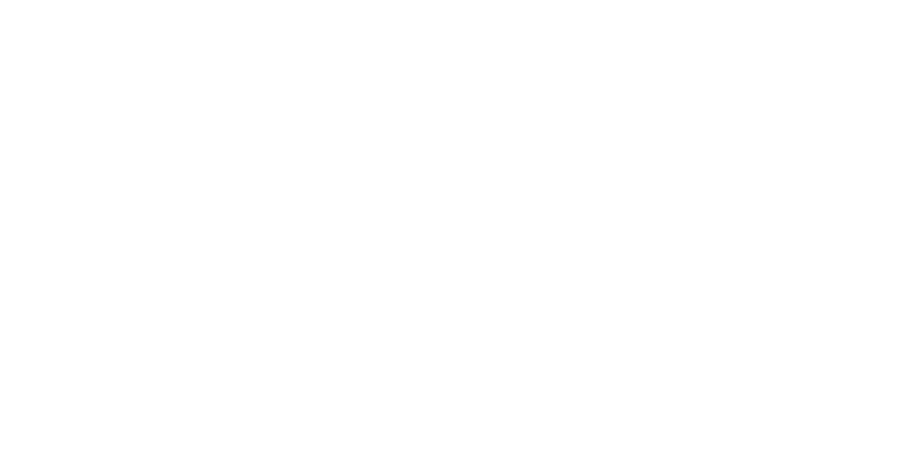

<IPython.core.display.Javascript object>


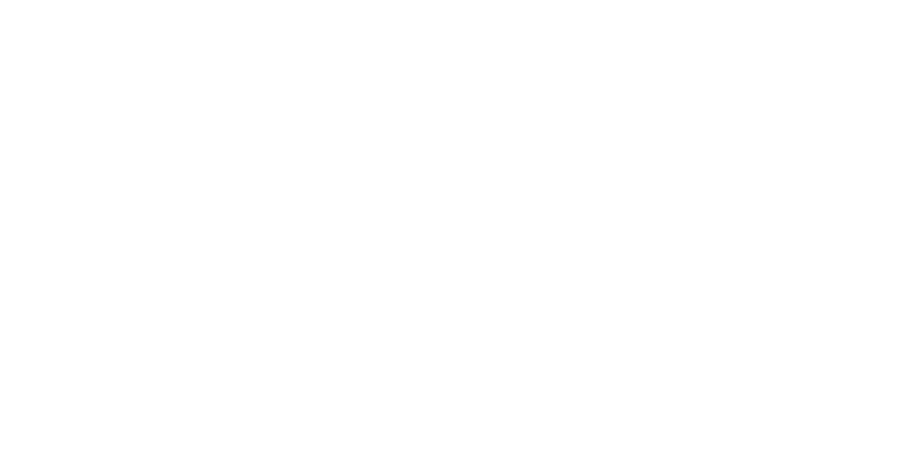

In [13]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(20, interactive)

{('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 0): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 1): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 2): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 3): 0}


<Figure size 720x360 with 0 Axes>

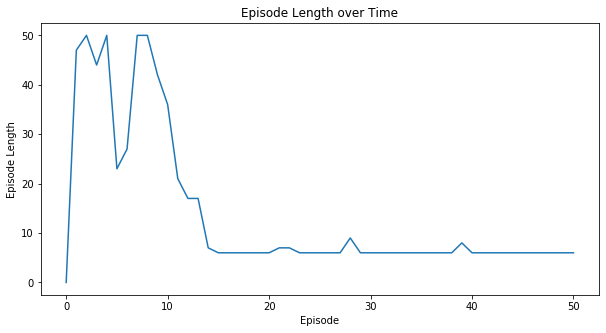

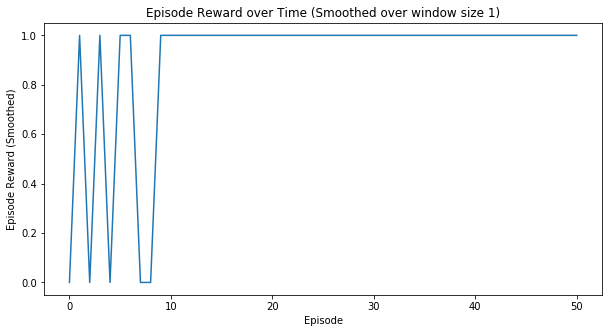

In [11]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

{((3, 11), 0): 0, ((3, 11), 1): 0, ((3, 11), 2): 0, ((3, 11), 3): 0}


<IPython.core.display.Javascript object>


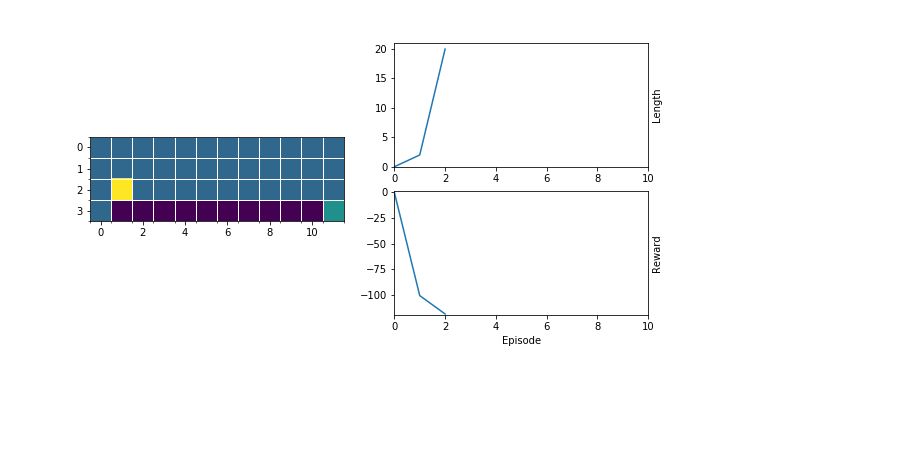

In [ ]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(20, interactive)
print(agent.Q)

{((3, 11), 0): 0, ((3, 11), 1): 0, ((3, 11), 2): 0, ((3, 11), 3): 0}


<Figure size 720x360 with 0 Axes>

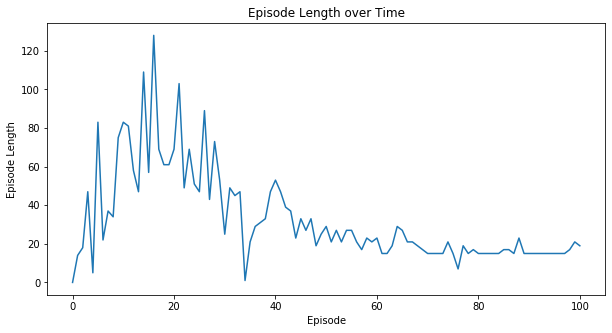

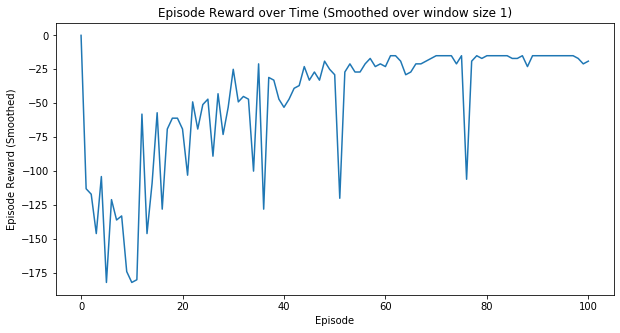

In [18]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(100, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

In [3]:
np.random.uniform(low=-2, high=0, size=([4,4] + [4]))

In [6]:
q_table.size

64

In [7]:
[4,4] + [4]

[4, 4, 4]

In [15]:
np.random.randint(0, 4) 

0

In [5]:
np.random.uniform(low=-0.2, high=0, size=([16,4]))

array([[-0.05615859, -0.1808438 , -0.09546947, -0.04186347],
       [-0.09563788, -0.18461424, -0.14681066, -0.08549308],
       [-0.17209858, -0.18930111, -0.13376304, -0.11691349],
       [-0.08789802, -0.00959094, -0.01273373, -0.14764041],
       [-0.10781259, -0.16156348, -0.02924805, -0.01184519],
       [-0.1726896 , -0.0141517 , -0.12177329, -0.01466175],
       [-0.03932288, -0.06894228, -0.09599477, -0.12889232],
       [-0.08397755, -0.1559405 , -0.12280893, -0.10328739],
       [-0.06501246, -0.13822483, -0.08942151, -0.14698997],
       [-0.03091874, -0.10607603, -0.10162618, -0.12410939],
       [-0.18743801, -0.06090736, -0.02413634, -0.03628234],
       [-0.09352822, -0.02060049, -0.1066573 , -0.19164674],
       [-0.02875049, -0.18763113, -0.06501123, -0.04064112],
       [-0.01046482, -0.02773578, -0.06276441, -0.19632336],
       [-0.0256954 , -0.12757445, -0.11324316, -0.09320842],
       [-0.07850668, -0.17326842, -0.09443949, -0.11971526]])

In [125]:
agent.Q

array([[-0.65768336, -0.82848856, -0.58883837, -0.00699471],
       [-1.03873292, -1.03854739, -0.91142893, -0.9452693 ],
       [-1.61912827, -1.40734751, -1.57195651, -0.82360278],
       [-1.63958307, -1.07247731, -1.4075321 , -1.35800741],
       [-0.73630513, -0.79371728, -0.55919053, -0.08241676],
       [-0.9543345 , -0.91723893, -0.60564739, -0.85342072],
       [-1.39129601, -0.72934867, -1.37686147, -1.51482016],
       [-1.1777981 , -1.07600907, -1.19966952, -0.11404556],
       [-0.31805205, -0.84643912, -0.63332133, -0.16643503],
       [-0.76174254, -0.76063222, -0.43658154, -0.65198459],
       [-0.39948439, -0.23710433, -0.51098837, -0.01537003],
       [-0.59765434, -0.98658304, -1.05856401,  0.40988668],
       [-0.52687682,  0.05176746, -0.51453437, -0.24751854],
       [-0.47558122,  0.18471891, -0.5068206 ,  0.00845008],
       [-0.03853729,  0.90511566, -0.56710461,  0.50481628],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [34]:
np.argmax(agent.Q[14,:])

1

In [35]:
agent.Q[14,:]

array([-0.68106473, -0.13500914, -1.83433976, -0.53217439])

In [45]:
agent.stateToString(5)

'5'

In [47]:
int(agent.stateToString(53))

53

In [119]:
agent.Q

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.]])

In [106]:
np.random.binomial(1, 0.99)

1

In [18]:
np.argmax([1,6,2,6,1])

1

In [22]:
i=np.argwhere([1,6,2,6,1]==np.argmax([1,6,2,6,1]))

In [61]:
i=np.nonzero(np.array([1,6,2,6,3])==2)

In [42]:
[1,6,2,6,3][np.argmax([1,6,2,6,1])]

6

In [62]:
i[0]

array([2])

In [64]:
np.random.choice(i[0])

2

In [34]:
np.random.choice(i[0])

0

In [18]:
np.random.randn(16,4)

array([[-1.04268566, -0.87896254, -0.04137672,  1.51955922],
       [-1.50977395, -0.31708457, -2.08093537,  1.5046878 ],
       [-1.23875923, -1.03861841, -0.57835512,  1.22235783],
       [ 1.0227717 , -0.50957898, -0.4451845 , -0.85772943],
       [ 2.29707448,  1.17653646,  0.02337837,  1.0610347 ],
       [ 0.30985763,  0.29757392, -0.21582947,  0.52269894],
       [-0.55767075, -1.89343231,  1.45138119,  1.36019696],
       [-1.07755759, -0.56517401, -1.44556482, -0.30950122],
       [-0.91317953,  0.04530633,  0.51229474,  1.62005329],
       [ 0.83358069, -0.25606499,  0.43511357, -2.31676088],
       [ 1.49054933,  0.5810846 , -0.77028398, -0.86641509],
       [ 1.90665836, -2.05124958, -1.39694334,  1.08392685],
       [ 0.35186643, -0.73731402, -0.93706694,  1.60907639],
       [ 0.51680323,  0.52657264,  0.97136513,  0.2219875 ],
       [ 0.10942455,  0.97410957, -0.06752025, -0.92157234],
       [ 1.72718227, -1.69260641, -1.06667342, -0.35769994]])

In [11]:
0%4

0

In [12]:
4%4

0

In [13]:
a=4

In [14]:
a %= 4

In [15]:
a

0

In [81]:
a=np.array([-10.,   0.,   0.,   0.])

In [82]:
np.argmax(a)

1

In [84]:
np.nonzero(a==a[np.argmax(a)])

(array([1, 2, 3]),)